# Gözetimsiz Öğrenme

Makine öğrenmesi modellerinde, bağımlı değişken elimizde olmadığı durumlarda, gözlem birimlerinin bir şekilde anlamlı hale getirilmesi çabasıdır.

# K-Means 

## Teori

* Amaç gözlemleri birbirlerine olan benzerliklerine göre kümelere ayırmaktır.
* K-Means algoritması hiyerarşik olmayan bir algoritmadır.

![image.png](image_01.png)

İyi bir K-Means çıktısında; kümeler içi benzerlik yüksek, kümeler dışı benzerlik düşük olmalıdır.

k sayısının ne olacağı konusunda karar vermek önemli bir adım çünkü k değiştiğinde hatalar da değişir.    

### Model

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as sp
from sklearn.cluster import KMeans

In [2]:
df_arrest = pd.read_csv("USArrests.csv")

In [3]:
df = df_arrest

In [4]:
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [6]:
df.index = df.iloc[:, 0]

In [7]:
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
Unnamed: 0,,,,,
Alabama,Alabama,13.2,236,58,21.2
Alaska,Alaska,10.0,263,48,44.5
Arizona,Arizona,8.1,294,80,31.0
Arkansas,Arkansas,8.8,190,50,19.5
California,California,9.0,276,91,40.6


In [8]:
df = df.iloc[:, 1:5]

In [9]:
df.head()

,Murder,Assault,UrbanPop,Rape
Unnamed: 0,,,,
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [12]:
df.index.name = None

In [13]:
df.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [14]:
df.isnull().sum()

Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 2.0+ KB


In [17]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Murder,50.0,7.788,4.355510,0.8,4.075,7.25,11.250,17.4
Assault,50.0,170.760,83.337661,45.0,109.000,159.00,249.000,337.0
UrbanPop,50.0,65.540,14.474763,32.0,54.500,66.00,77.750,91.0
Rape,50.0,21.232,9.366385,7.3,15.075,20.10,26.175,46.0


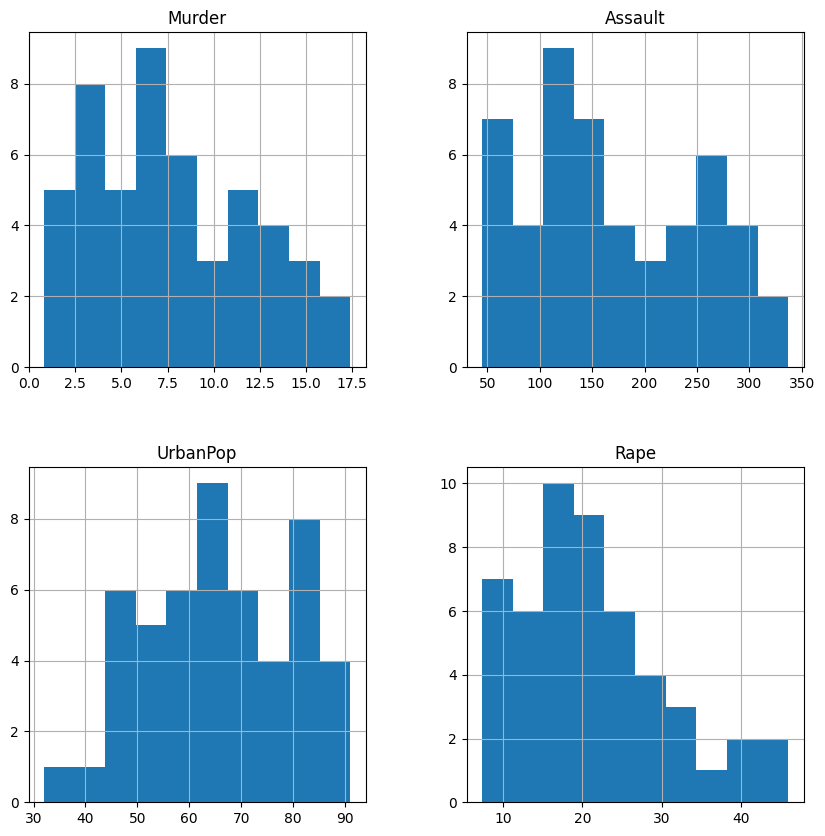

In [19]:
df.hist(figsize=(10, 10));

In [22]:
kmeans = KMeans(n_clusters=4)
kmeans.get_params()

{'algorithm': 'lloyd',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 300,
 'n_clusters': 4,
 'n_init': 'auto',
 'random_state': None,
 'tol': 0.0001,
 'verbose': 0}

In [23]:
k_fit = kmeans.fit(df)

In [24]:
k_fit.n_clusters

4

In [25]:
k_fit.cluster_centers_

array([[  4.27      ,  87.55      ,  59.75      ,  14.39      ],
       [ 12.26666667, 251.75      ,  67.58333333,  28.40833333],
       [ 11.84      , 310.2       ,  68.4       ,  27.78      ],
       [  7.50769231, 170.38461538,  71.46153846,  22.61538462]])

In [26]:
k_fit.labels_

array([1, 1, 2, 3, 1, 3, 0, 1, 2, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 2, 3, 1,
       0, 1, 3, 0, 0, 1, 0, 3, 2, 1, 2, 0, 0, 3, 3, 0, 3, 1, 0, 3, 3, 0,
       0, 3, 3, 0, 0, 3], dtype=int32)

In [27]:
kmeans = KMeans(n_clusters=2)
k_fit = kmeans.fit(df)

In [28]:
kumeler = k_fit.labels_

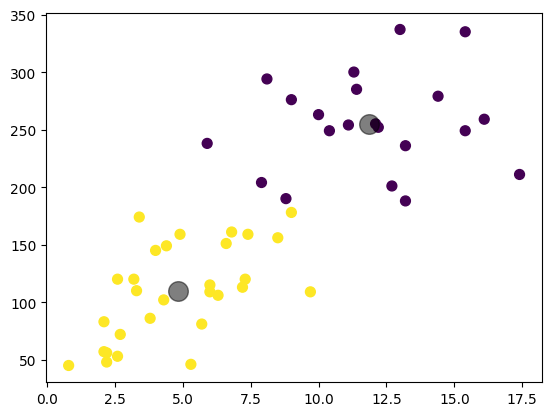

In [31]:
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=kumeler, s=50, cmap="viridis");
merkezler = k_fit.cluster_centers_
plt.scatter(merkezler[:, 0], merkezler[:, 1], c="black", s=200, alpha=0.5)

K-Means sonucu oluşan segmentleri görselleştirmenin 2 yolu var:

1) İki değişken seçip scatterplot yapmak
2) PCA ile boyut indirgemesi yapıp görselleştirme yapmak

In [32]:
from mpl_toolkits.mplot3d import Axes3D

In [38]:
kmeans = KMeans(n_clusters=3)
k_fit = kmeans.fit(df)
kumeler = k_fit.labels_
merkezler = kmeans.cluster_centers_

In [39]:
plt.rcParams['figure.figsize'] = (16, 9)
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(df.iloc[:, 0], df.iloc[:, 1], df.iloc[:, 2]);

<Figure size 1600x900 with 0 Axes>